In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
df = pd.read_json('../app/files/data.json')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [7]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


What is a fraud event?

In [9]:
df['acct_type'].unique().tolist()

['fraudster_event',
 'premium',
 'spammer_warn',
 'fraudster',
 'spammer_limited',
 'spammer_noinvite',
 'locked',
 'tos_lock',
 'tos_warn',
 'fraudster_att',
 'spammer_web',
 'spammer']

Breakout of `acct_types`

In [25]:
df.groupby('acct_type')['approx_payout_date'].count().reset_index().sort_values('approx_payout_date', ascending = False)

,acct_type,approx_payout_date
4,premium,12373
2,fraudster_event,851
0,fraudster,437
6,spammer_limited,218
8,spammer_warn,144
11,tos_warn,91
7,spammer_noinvite,84
10,tos_lock,77
3,locked,54
1,fraudster_att,5


## What do frauds look like

In [82]:
frauds = ['fraudster_event', 'fraudster', 'fraudster_att']
df['frauds'] = [True if i in frauds else False for i in df['acct_type']]
# df['frauds'].head()

In [83]:
df[df['frauds']].sample(10)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,frauds
26,fraudster,1299607200,870,11,US,USD,0.0,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",hotmail.com,1299171416,...,42,1295576777,3,400 Fifth Avenue,US,40.750228,-73.983714,The Setai,NY,True
3825,fraudster_event,1365656400,0,0,US,USD,0.0,,yahoo.com,1361771196,...,23,1359730754,1,,None,NaN,NaN,None,None,True
5771,fraudster_event,1354492800,1703,5,GB,GBP,0.0,"<p> </p>\r\n<p><span style=""font-size: large;""...",consultant.com,1353717222,...,0,1353717220,1,"STRATFORD ROAD,",GB,52.409192,-1.826313,THE REGENCY HOTEL,Solihull,True
8673,fraudster_event,1339209000,81,8,GB,GBP,0.0,"<p><span style=""font-size: x-small;"">This even...",zumba-perth.com,1335365680,...,0,1335364397,1,251 High Street,GB,56.396611,-3.431943,Julie's School of Dance,,True
621,fraudster,1331964000,540,11,US,USD,0.0,"<p> </p>\r\n<p><span class=""st""><em>Aquanox</e...",gmail.com,1331160870,...,0,1331160869,1,,US,33.836313,-84.385744,3280 peachtree road,GA,True
9059,fraudster,1306378800,615,6,GB,GBP,0.0,"<p><strong>Europolis, the Town of the Delta<br...",lidf.co.uk,1304714665,...,1834,1146260369,3,32 Smith Square,GB,51.495764,-0.127483,Europe House,London,True
11131,fraudster,1331020500,149,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call Blitz is sched...,gmail.com,1330527362,...,300,1304639602,3,,None,NaN,NaN,None,None,True
6689,fraudster_event,1345762800,0,0,CA,CAD,0.0,,diversity-church.com,1341868615,...,8,1341189473,1,,None,NaN,NaN,None,None,True
263,fraudster_event,1353196800,1074,8,GB,GBP,0.0,"<p><span style=""font-size: medium;"">we provide...",mail.com,1352372986,...,0,1352372984,1,Middle Aston,GB,51.938213,-1.309767,Middle Aston House,,True
9444,fraudster_event,1377493200,0,0,GB,GBP,0.0,,gmail.com,1373610978,...,9,1372770377,3,,None,NaN,NaN,None,None,True


2007-02-12 05:00:00 2018-04-11 23:00:00


### Time conversion function

In [84]:
time_cols = ['approx_payout_date', 'event_created', 'event_published','event_start', 'user_created']

In [85]:
for col in time_cols:
    df[col] = df[col].astype('datetime64[s]')

check

In [86]:
print(df['approx_payout_date'].min(),
df['approx_payout_date'].max())

2007-02-12 05:00:00 2018-04-11 23:00:00


In [89]:
df.listed.head()

0    y
1    n
2    y
3    y
4    y
Name: listed, dtype: object

### Cleaners

In [100]:
df['num_previous_payouts'] = [len(i) for i in df['previous_payouts']]

In [103]:
df['listed'] = [True if i=='y' else False for i in df['listed']]

### Currency vs Country

In [104]:
df[['country','currency']].head()

,country,currency
0,US,USD
1,US,USD
2,US,USD
3,IE,EUR
4,US,USD


In [105]:
df.currency.unique()

array(['USD', 'EUR', 'CAD', 'GBP', 'AUD', 'NZD', 'MXN'], dtype=object)

### Interesting fields

In [90]:
for_hist = ['body_length', 
            'channels',
            'country',
            'currency',
            'delivery_method',
            'email_domain',
            'fb_published',
            'has_analytics',
            'listed',
            'num_payouts', 
            'payout_type',
            'sale_duration', 
            'sale_duration2',
            'ticket_types',
            'user_age']

In [98]:
df_clean = df[df['frauds'] == False]
df_dirty = df[df['frauds']]

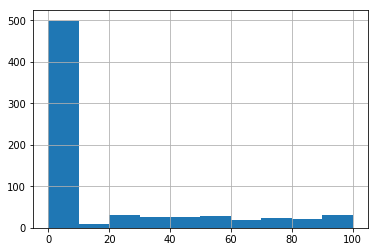

In [99]:
# fig, ax = plt.subplots(2)
df_clean['body_length'].hist(range = (0,100))

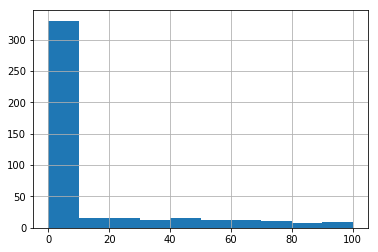

In [97]:
df_dirty['body_length'].hist(range = (0,100))